### Investigating the MtHopper_2016.nc forcing data and changing the local attributes file to match Mt Hop. 

Import packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pysumma as ps
import copy
import os.path

from pysumma.plotting import plotting
from jupyterthemes import jtplot

from netCDF4 import Dataset
import pandas as pd
import numpy as np
import xarray as xr

In [2]:
# Want to investigate the forcings data for mtHop
mthop_forcings_file = '/home/jovyan/work/cewa564_project/olympics/mthop/summa_setup/forcings/MtHopper_2016.nc'
mthop_forcings = Dataset(mthop_forcings_file, mode='r') #from netCDF4 import Dataset 

mthop_forcings

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): hru(1), time(7177)
    variables(dimensions): float64 LWRadAtm(time,hr), float64 SWRadAtm(time,hr), float64 airtemp(time,hr), float64 pptrate(time,hr), float64 spechum(time,hr), float64 airpres(time,hr), float64 windspd(time,hr), float64 time(time), float64 datastep(), float64 latitude(hr), float64 longitude(hr), float64 hruID(hr), float64 hruId(hr), float64 data_step()
    groups: 

In [3]:
# Trying to open the dataset with xarray instead
mthop_xr = xr.open_dataset(mthop_forcings_file)
mthop_xr

<xarray.Dataset>
Dimensions:    (hru: 1, time: 7177)
Coordinates:
  * time       (time) datetime64[ns] 2015-10-01 ... 2016-07-26
Dimensions without coordinates: hru
Data variables:
    LWRadAtm   (time, hru) float64 ...
    SWRadAtm   (time, hru) float64 ...
    airtemp    (time, hru) float64 ...
    pptrate    (time, hru) float64 ...
    spechum    (time, hru) float64 ...
    airpres    (time, hru) float64 ...
    windspd    (time, hru) float64 ...
    datastep   float64 ...
    latitude   (hru) float64 ...
    longitude  (hru) float64 ...
    hruID      (hru) float64 ...
    hruId      (hru) float64 ...
    data_step  float64 ...

In [4]:
mthop_xr['latitude']

<xarray.DataArray 'latitude' (hru: 1)>
array([47.633794])
Dimensions without coordinates: hru

In [5]:
mthop_xr['longitude']

<xarray.DataArray 'longitude' (hru: 1)>
array([-123.310106])
Dimensions without coordinates: hru

In [14]:
mthop_xr['hruID']

<xarray.DataArray 'hruID' (hru: 1)>
array([9.96921e+36])
Dimensions without coordinates: hru

In [15]:
mthop_xr['hruId']

<xarray.DataArray 'hruId' (hru: 1)>
array([1001.])
Dimensions without coordinates: hru

In [16]:
mthop_xr['data_step']

<xarray.DataArray 'data_step' ()>
array(3600.)

/srv/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


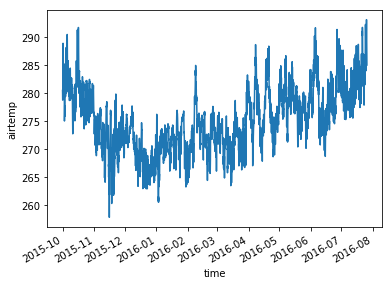

In [15]:
mthop_xr['airtemp'].plot()

## Editing the local attributes netCDF

In [4]:
# Need to change the local attributes netCDF to contain the correct information.
# Lat, long, elevation, tan_slope, contour length, HRU area, mHeight
local_attributes_file = '/home/jovyan/work/cewa564_project/olympics/mthop/summa_setup/params/local_attributes_og_copy.nc'
local_a = Dataset(local_attributes_file, mode='r')
local_a

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    history: Converted to NetCDF using "../../tools/localAttributes_ascii_to_nc.py --nc_template ../../tools/summa_zLocalAttributes_template.nc --ascii_in summa_zLocalAttributes_Amplero.txt --nc_out summa_zLocalAttributes_Amplero.nc" on 2017-05-08 08:34:16

    dimensions(sizes): hru(1), gru(1)
    variables(dimensions): int32 hruId(hr), int32 gruId(gr), int32 hru2gruId(hr), int32 downHRUindex(hr), float64 longitude(hr), float64 latitude(hr), float64 elevation(hr), float64 HRUarea(hr), float64 tan_slope(hr), float64 contourLength(hr), int32 slopeTypeIndex(hr), int32 soilTypeIndex(hr), int32 vegTypeIndex(hr), float64 mHeight(hr)
    groups: 

#### Changing the attributes file here with xarray

* xarray to netCDF is a built in function
* xarray.Dataset.to_netcdf(path=None, mode='w')
* http://xarray.pydata.org/en/stable/generated/xarray.Dataset.to_netcdf.html

In [5]:
# Mtn Hopper
# - Latitude should be: 47.633794
# - Longitude should be: -123.310106
# - Elevation should be: 4748 in feet or 1447.19 meters, need it in meters 

site_latitude = 47.633794
site_longitude = 123.310106
site_elevation  = 1447.19

local_attributes_file = '/home/jovyan/work/cewa564_project/olympics/mthop/summa_setup/params/local_attributes_og_copy.nc'
local_xr = xr.open_dataset(local_attributes_file)

In [6]:
# changing  the values in the xarray dataset 
local_xr['latitude'][:] = site_latitude
local_xr['longitude'][:] = site_longitude
local_xr['elevation'][:] = site_elevation

In [7]:
local_xr['hruId'] # 1001 is correct 

<xarray.DataArray 'hruId' (hru: 1)>
array([1001], dtype=int32)
Dimensions without coordinates: hru
Attributes:
    long_name:  Index of hydrological response unit (HRU)
    units:      -
    v_type:     scalarv

In [8]:
# Just checking
local_xr['latitude']

<xarray.DataArray 'latitude' (hru: 1)>
array([47.633794])
Dimensions without coordinates: hru
Attributes:
    long_name:  Latitude of HRU's centroid
    units:      Decimal degree north

In [9]:
# write the correct xarray values to a new netCDF file
#xr.local.to_netcdf
local_xr.to_netcdf('/home/jovyan/work/cewa564_project/olympics/mthop/summa_setup/params/local_attributes.nc')